In [23]:
from typing import Dict,TypedDict,List
from langgraph.graph import StateGraph,END,START
from IPython.display import Image, display

In [24]:
class BankState(TypedDict):
    balance: int
    goal: int
    transactions: int

In [25]:
def bank_checker(state: BankState):
    print(f"--- Checking Balance: ${state['balance']} ---")
    return state

def work_job_node(state: BankState):
    # Every time this node runs, we add $100 and increment the counter
    new_balance = state["balance"] + 100
    print(f"--- Working... Added $100. New Total: ${new_balance} ---")
    return {
        "balance": new_balance,
        "transactions": state["transactions"] + 1
    }

#Why we did not use state["balance"] += 100 ?
# In LangGraph, we avoid mutating the state variable directly because nodes must return a partial
# update (a "patch")  to allow the framework to safely merge changes and maintain a clean
# history of every step.

In [26]:
#The Router
def check_goal_met(state: BankState):
    if state["balance"] < state["goal"]:
        return "keep_working"
    return "stop"

In [27]:
graph=StateGraph(BankState)
graph.add_node("checker", bank_checker)
graph.add_node("job", work_job_node)

graph.set_entry_point("checker")
graph.add_edge("job", "checker")

graph.add_conditional_edges(
    "checker",
    check_goal_met, # router function
    {
        "keep_working": "job",
        "stop": END
    }
)

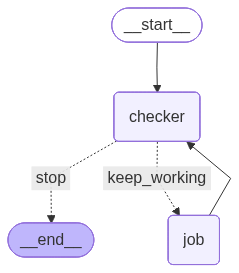

In [28]:
app=graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))

In [29]:
initial_state = {"balance": 0, "goal": 500, "transactions": 0}

print("Starting the Savings Loop...\n")
result = app.invoke(initial_state)

print("\n-----------FINAL STATE---------")
print(f"Final Balance: ${result['balance']}")
print(f"Total Iterations (Work Days): {result['transactions']}")

Starting the Savings Loop...

--- Checking Balance: $0 ---
--- Working... Added $100. New Total: $100 ---
--- Checking Balance: $100 ---
--- Working... Added $100. New Total: $200 ---
--- Checking Balance: $200 ---
--- Working... Added $100. New Total: $300 ---
--- Checking Balance: $300 ---
--- Working... Added $100. New Total: $400 ---
--- Checking Balance: $400 ---
--- Working... Added $100. New Total: $500 ---
--- Checking Balance: $500 ---

-----------FINAL STATE---------
Final Balance: $500
Total Iterations (Work Days): 5


In [30]:
initial_state = {"balance": 700, "goal": 500, "transactions": 0}

print("Starting the Savings Loop...\n")
result = app.invoke(initial_state)

print("\n-----------FINAL STATE---------")
print(f"Final Balance: ${result['balance']}")
print(f"Total Iterations (Work Days): {result['transactions']}")

Starting the Savings Loop...

--- Checking Balance: $700 ---

-----------FINAL STATE---------
Final Balance: $700
Total Iterations (Work Days): 0
